# 캘리포니아 지역 집값 예측

# 데이터 구조 및 유형
| Variable | Definition | Type |
|----------|------------|-----|
| longitude| Longitude	| Continuous |
| latitude | Latitude   | Continuous |
| housingmedianage | Median age of houses in area | Continuous |
| total_rooms | Avg No. of rooms of houses in area | Continuous |
| total_bedrooms | Avg No. of bedrooms of houses in area | Continuous |
| population | No. of people in area | Continuous |
| households | No. of households in area | Continuous |
| median_income | Median income of household | Continuous |
| medianhousevalue | Median value of houses in area | Continuous |
| ocean_proximity | Proximity to ocean	| Categorical |

# 환경 설정

In [1]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as folium
from folium import plugins
from folium.plugins import HeatMap
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore') # 경고창 무시

## 데이터 읽기 및 조회
 - `/mnt/elice/dataset/housing.csv`을 읽어 df에 저장하세요

In [2]:
# 코드를 입력해 주세요
df = pd.read_csv('/mnt/elice/dataset/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>longitude</th>
      <th>latitude</th>
      <th>housing_median_age</th>
      <th>total_rooms</th>
      <th>total_bedrooms</th>
      <th>population</th>
      <th>households</th>
      <th>median_income</th>
      <th>median_house_value</th>
      <th>ocean_proximity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-122.23</td>
      <td>37.88</td>
      <td>41.0</td>
      <td>880.0</td>
      <td>129.0</td>
      <td>322.0</td>
      <td>126.0</td>
      <td>8.3252</td>
      <td>452600.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-122.22</td>
      <td>37.86</td>
      <td>21.0</td>
      <td>7099.0</td>
      <td>1106.0</td>
      <td>2401.0</td>
      <td>1138.0</td>
      <td>8.3014</td>
      <td>358500.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-122.24</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>1467.0</td>
      <td>190.0</td>
      <td>496.0</td>
      <td>177.0</td>
      <td>7.2574</td>
      <td>352100.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-122.25</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>1274.0</td>
      <td>235.0</td>
      <td>558.0</td>
      <td>219.0</td>
      <td>5.6431</td>
      <td>341300.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-122.25</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>1627.0</td>
      <td>280.0</td>
      <td>565.0</td>
      <td>259.0</td>
      <td>3.8462</td>
      <td>342200.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>20635</th>
      <td>-121.09</td>
      <td>39.48</td>
      <td>25.0</td>
      <td>1665.0</td>
      <td>374.0</td>
      <td>845.0</td>
      <td>330.0</td>
      <td>1.5603</td>
      <td>78100.0</td>
      <td>INLAND</td>
    </tr>
    <tr>
      <th>20636</th>
      <td>-121.21</td>
      <td>39.49</td>
      <td>18.0</td>
      <td>697.0</td>
      <td>150.0</td>
      <td>356.0</td>
      <td>114.0</td>
      <td>2.5568</td>
      <td>77100.0</td>
      <td>INLAND</td>
    </tr>
    <tr>
      <th>20637</th>
      <td>-121.22</td>
      <td>39.43</td>
      <td>17.0</td>
      <td>2254.0</td>
      <td>485.0</td>
      <td>1007.0</td>
      <td>433.0</td>
      <td>1.7000</td>
      <td>92300.0</td>
      <td>INLAND</td>
    </tr>
    <tr>
      <th>20638</th>
      <td>-121.32</td>
      <td>39.43</td>
      <td>18.0</td>
      <td>1860.0</td>
      <td>409.0</td>
      <td>741.0</td>
      <td>349.0</td>
      <td>1.8672</td>
      <td>84700.0</td>
      <td>INLAND</td>
    </tr>
    <tr>
      <th>20639</th>
      <td>-121.24</td>
      <td>39.37</td>
      <td>16.0</td>
      <td>2785.0</td>
      <td>616.0</td>
      <td>1387.0</td>
      <td>530.0</td>
      <td>2.3886</td>
      <td>89400.0</td>
      <td>INLAND</td>
    </tr>
  </tbody>
</table>
<p>20640 rows × 10 columns</p>
</div>

- 데이터 프레임의 상위 20개를 조회하세요.

In [3]:
# 코드를 입력해 주세요
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>longitude</th>
      <th>latitude</th>
      <th>housing_median_age</th>
      <th>total_rooms</th>
      <th>total_bedrooms</th>
      <th>population</th>
      <th>households</th>
      <th>median_income</th>
      <th>median_house_value</th>
      <th>ocean_proximity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-122.23</td>
      <td>37.88</td>
      <td>41.0</td>
      <td>880.0</td>
      <td>129.0</td>
      <td>322.0</td>
      <td>126.0</td>
      <td>8.3252</td>
      <td>452600.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-122.22</td>
      <td>37.86</td>
      <td>21.0</td>
      <td>7099.0</td>
      <td>1106.0</td>
      <td>2401.0</td>
      <td>1138.0</td>
      <td>8.3014</td>
      <td>358500.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-122.24</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>1467.0</td>
      <td>190.0</td>
      <td>496.0</td>
      <td>177.0</td>
      <td>7.2574</td>
      <td>352100.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-122.25</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>1274.0</td>
      <td>235.0</td>
      <td>558.0</td>
      <td>219.0</td>
      <td>5.6431</td>
      <td>341300.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-122.25</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>1627.0</td>
      <td>280.0</td>
      <td>565.0</td>
      <td>259.0</td>
      <td>3.8462</td>
      <td>342200.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>5</th>
      <td>-122.25</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>919.0</td>
      <td>213.0</td>
      <td>413.0</td>
      <td>193.0</td>
      <td>4.0368</td>
      <td>269700.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>6</th>
      <td>-122.25</td>
      <td>37.84</td>
      <td>52.0</td>
      <td>2535.0</td>
      <td>489.0</td>
      <td>1094.0</td>
      <td>514.0</td>
      <td>3.6591</td>
      <td>299200.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>7</th>
      <td>-122.25</td>
      <td>37.84</td>
      <td>52.0</td>
      <td>3104.0</td>
      <td>687.0</td>
      <td>1157.0</td>
      <td>647.0</td>
      <td>3.1200</td>
      <td>241400.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>8</th>
      <td>-122.26</td>
      <td>37.84</td>
      <td>42.0</td>
      <td>2555.0</td>
      <td>665.0</td>
      <td>1206.0</td>
      <td>595.0</td>
      <td>2.0804</td>
      <td>226700.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>9</th>
      <td>-122.25</td>
      <td>37.84</td>
      <td>52.0</td>
      <td>3549.0</td>
      <td>707.0</td>
      <td>1551.0</td>
      <td>714.0</td>
      <td>3.6912</td>
      <td>261100.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>10</th>
      <td>-122.26</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>2202.0</td>
      <td>434.0</td>
      <td>910.0</td>
      <td>402.0</td>
      <td>3.2031</td>
      <td>281500.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>11</th>
      <td>-122.26</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>3503.0</td>
      <td>752.0</td>
      <td>1504.0</td>
      <td>734.0</td>
      <td>3.2705</td>
      <td>241800.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>12</th>
      <td>-122.26</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>2491.0</td>
      <td>474.0</td>
      <td>1098.0</td>
      <td>468.0</td>
      <td>3.0750</td>
      <td>213500.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>13</th>
      <td>-122.26</td>
      <td>37.84</td>
      <td>52.0</td>
      <td>696.0</td>
      <td>191.0</td>
      <td>345.0</td>
      <td>174.0</td>
      <td>2.6736</td>
      <td>191300.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>14</th>
      <td>-122.26</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>2643.0</td>
      <td>626.0</td>
      <td>1212.0</td>
      <td>620.0</td>
      <td>1.9167</td>
      <td>159200.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>15</th>
      <td>-122.26</td>
      <td>37.85</td>
      <td>50.0</td>
      <td>1120.0</td>
      <td>283.0</td>
      <td>697.0</td>
      <td>264.0</td>
      <td>2.1250</td>
      <td>140000.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>16</th>
      <td>-122.27</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>1966.0</td>
      <td>347.0</td>
      <td>793.0</td>
      <td>331.0</td>
      <td>2.7750</td>
      <td>152500.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>17</th>
      <td>-122.27</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>1228.0</td>
      <td>293.0</td>
      <td>648.0</td>
      <td>303.0</td>
      <td>2.1202</td>
      <td>155500.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>18</th>
      <td>-122.26</td>
      <td>37.84</td>
      <td>50.0</td>
      <td>2239.0</td>
      <td>455.0</td>
      <td>990.0</td>
      <td>419.0</td>
      <td>1.9911</td>
      <td>158700.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>19</th>
      <td>-122.27</td>
      <td>37.84</td>
      <td>52.0</td>
      <td>1503.0</td>
      <td>298.0</td>
      <td>690.0</td>
      <td>275.0</td>
      <td>2.6033</td>
      <td>162900.0</td>
      <td>NEAR BAY</td>
    </tr>
  </tbody>
</table>
</div>

- 데이터 프레임의 shape을 확인하세요.

In [4]:
# 코드를 입력해 주세요
df.shape

(20640, 10)

<p><strong>[출력 결과]</strong></p><pre>(20640, 10)</pre>

- 데이터 프레임의 정보를 확인하세요.

In [5]:
# 코드를 입력해 주세요
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p><strong>[출력 결과]</strong></p><pre><class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
</pre>

- 각 컬럼별 결측치의 개수를 조회하세요.

In [6]:
# 코드를 입력해 주세요
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<p><strong>[출력 결과]</strong></p><pre>longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64</pre>

- 각 컬럼별 결측치의 비율를 조회하세요.
- 비율 = 결측치 / 전체 데이터

In [7]:
# 코드를 입력해 주세요
df.isna().mean() # 결측치 비율

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

<p><strong>[출력 결과]</strong></p><pre>longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64</pre>

- 결측치가 존재하는 행 정보를 확인하세요.

In [8]:
# 코드를 입력해 주세요
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>longitude</th>
      <th>latitude</th>
      <th>housing_median_age</th>
      <th>total_rooms</th>
      <th>total_bedrooms</th>
      <th>population</th>
      <th>households</th>
      <th>median_income</th>
      <th>median_house_value</th>
      <th>ocean_proximity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>290</th>
      <td>-122.16</td>
      <td>37.77</td>
      <td>47.0</td>
      <td>1256.0</td>
      <td>NaN</td>
      <td>570.0</td>
      <td>218.0</td>
      <td>4.3750</td>
      <td>161900.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>341</th>
      <td>-122.17</td>
      <td>37.75</td>
      <td>38.0</td>
      <td>992.0</td>
      <td>NaN</td>
      <td>732.0</td>
      <td>259.0</td>
      <td>1.6196</td>
      <td>85100.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>538</th>
      <td>-122.28</td>
      <td>37.78</td>
      <td>29.0</td>
      <td>5154.0</td>
      <td>NaN</td>
      <td>3741.0</td>
      <td>1273.0</td>
      <td>2.5762</td>
      <td>173400.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>563</th>
      <td>-122.24</td>
      <td>37.75</td>
      <td>45.0</td>
      <td>891.0</td>
      <td>NaN</td>
      <td>384.0</td>
      <td>146.0</td>
      <td>4.9489</td>
      <td>247100.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>696</th>
      <td>-122.10</td>
      <td>37.69</td>
      <td>41.0</td>
      <td>746.0</td>
      <td>NaN</td>
      <td>387.0</td>
      <td>161.0</td>
      <td>3.9063</td>
      <td>178400.0</td>
      <td>NEAR BAY</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>20267</th>
      <td>-119.19</td>
      <td>34.20</td>
      <td>18.0</td>
      <td>3620.0</td>
      <td>NaN</td>
      <td>3171.0</td>
      <td>779.0</td>
      <td>3.3409</td>
      <td>220500.0</td>
      <td>NEAR OCEAN</td>
    </tr>
    <tr>
      <th>20268</th>
      <td>-119.18</td>
      <td>34.19</td>
      <td>19.0</td>
      <td>2393.0</td>
      <td>NaN</td>
      <td>1938.0</td>
      <td>762.0</td>
      <td>1.6953</td>
      <td>167400.0</td>
      <td>NEAR OCEAN</td>
    </tr>
    <tr>
      <th>20372</th>
      <td>-118.88</td>
      <td>34.17</td>
      <td>15.0</td>
      <td>4260.0</td>
      <td>NaN</td>
      <td>1701.0</td>
      <td>669.0</td>
      <td>5.1033</td>
      <td>410700.0</td>
      <td>&lt;1H OCEAN</td>
    </tr>
    <tr>
      <th>20460</th>
      <td>-118.75</td>
      <td>34.29</td>
      <td>17.0</td>
      <td>5512.0</td>
      <td>NaN</td>
      <td>2734.0</td>
      <td>814.0</td>
      <td>6.6073</td>
      <td>258100.0</td>
      <td>&lt;1H OCEAN</td>
    </tr>
    <tr>
      <th>20484</th>
      <td>-118.72</td>
      <td>34.28</td>
      <td>17.0</td>
      <td>3051.0</td>
      <td>NaN</td>
      <td>1705.0</td>
      <td>495.0</td>
      <td>5.7376</td>
      <td>218600.0</td>
      <td>&lt;1H OCEAN</td>
    </tr>
  </tbody>
</table>
<p>207 rows × 10 columns</p>
</div>

- 결측치 위치 시각화 > isna() 함수를 적용 후 해당 결과를 시각화
- cmap='gray'

<AxesSubplot: >

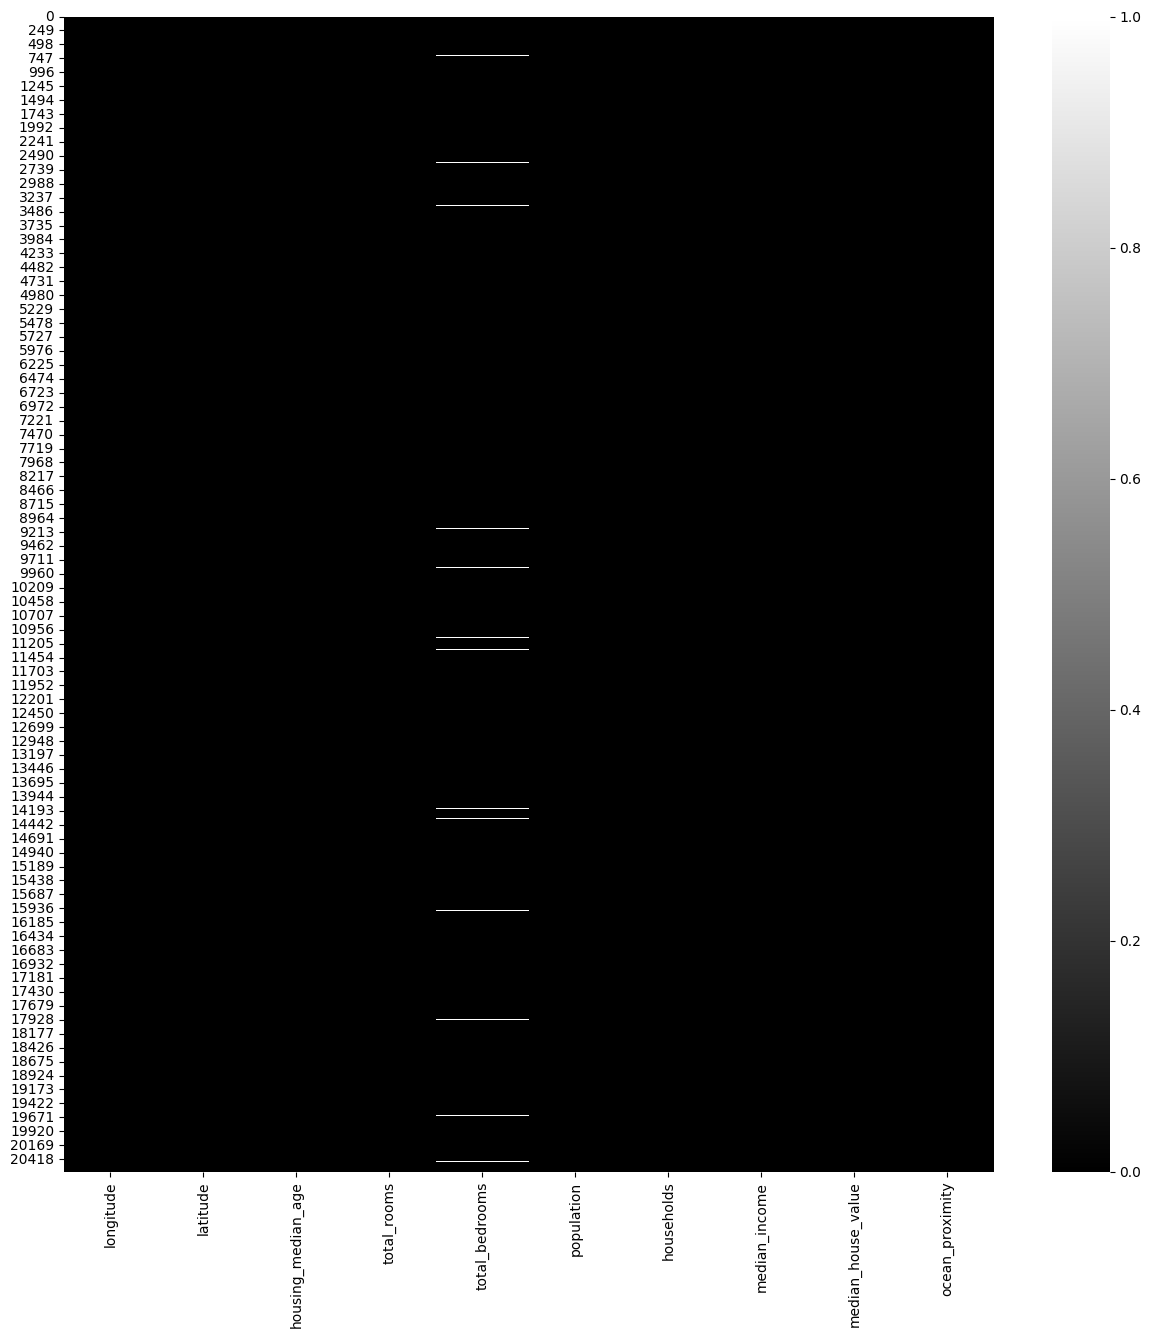

In [9]:
# 코드를 입력해 주세요
plt.figure(figsize = (15, 15))
sns.heatmap(df.isna(), cmap = 'gray')

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:></pre>

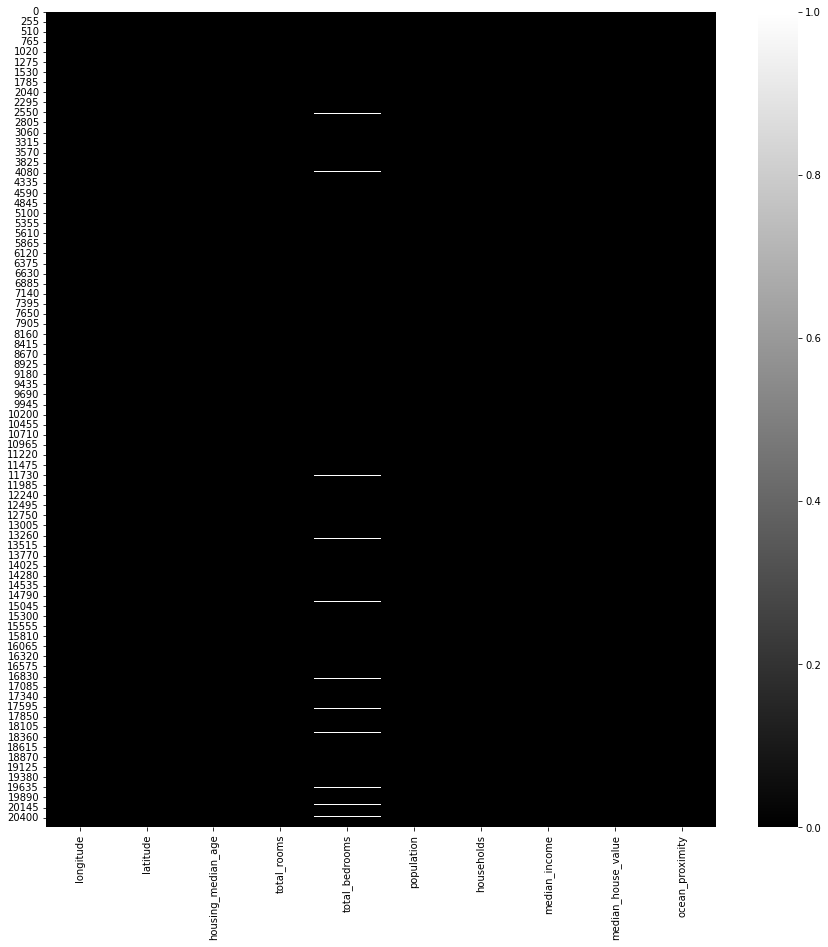

- sns.histplot 함수를 사용하여 median_house_value 컬럼을 시각화하세요.
- kde=True, bins=40를 적용하세요.

<p><strong>[출력 결과]</strong></p><pre><Figure size 1080x1080 with 2 Axes></pre>

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

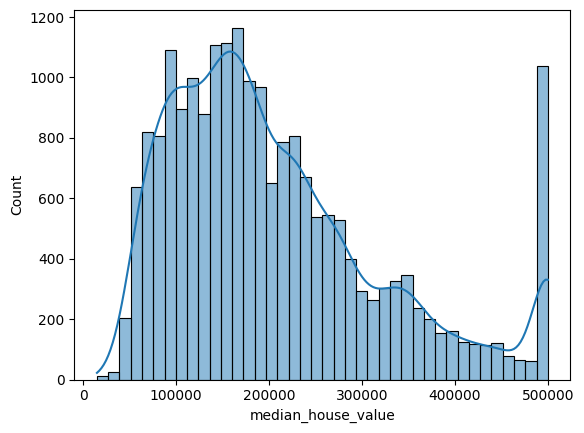

In [10]:
# 코드를 입력해 주세요
sns.histplot(df['median_house_value'], kde=True, bins = 40)

# 예측해야하는 값의 스케일이 크다 + 분포가 왼쪽에 쏠려있다 -> 로그변환

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:xlabel='median_house_value', ylabel='Count'></pre>

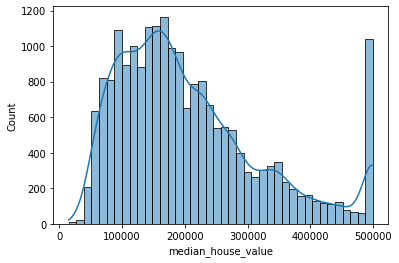

- median_house_value 컬럼의 통계적 요약 정보를 조회하세요.

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

In [11]:
# 코드를 입력해 주세요
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

<p><strong>[출력 결과]</strong></p><pre>count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64</pre>

- total_bedrooms의 중앙값으로 결측치를 대체하세요.

In [12]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- 결측치가 존재하는지 확인하세요.

In [13]:
# 코드를 입력해 주세요
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<p><strong>[출력 결과]</strong></p><pre>longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64</pre>

- 각 컬럼별 고유값의 개수를 조회하세요 > nunique 함수 사용

In [14]:
# 코드를 입력해 주세요
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

<p><strong>[출력 결과]</strong></p><pre>longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64</pre>

- 데이터 프레임의 hist 함수를 사용하여 각 컬럼별 분포를 확인하세요.
- bins=50, figsize=(20,15)를 적용하세요.

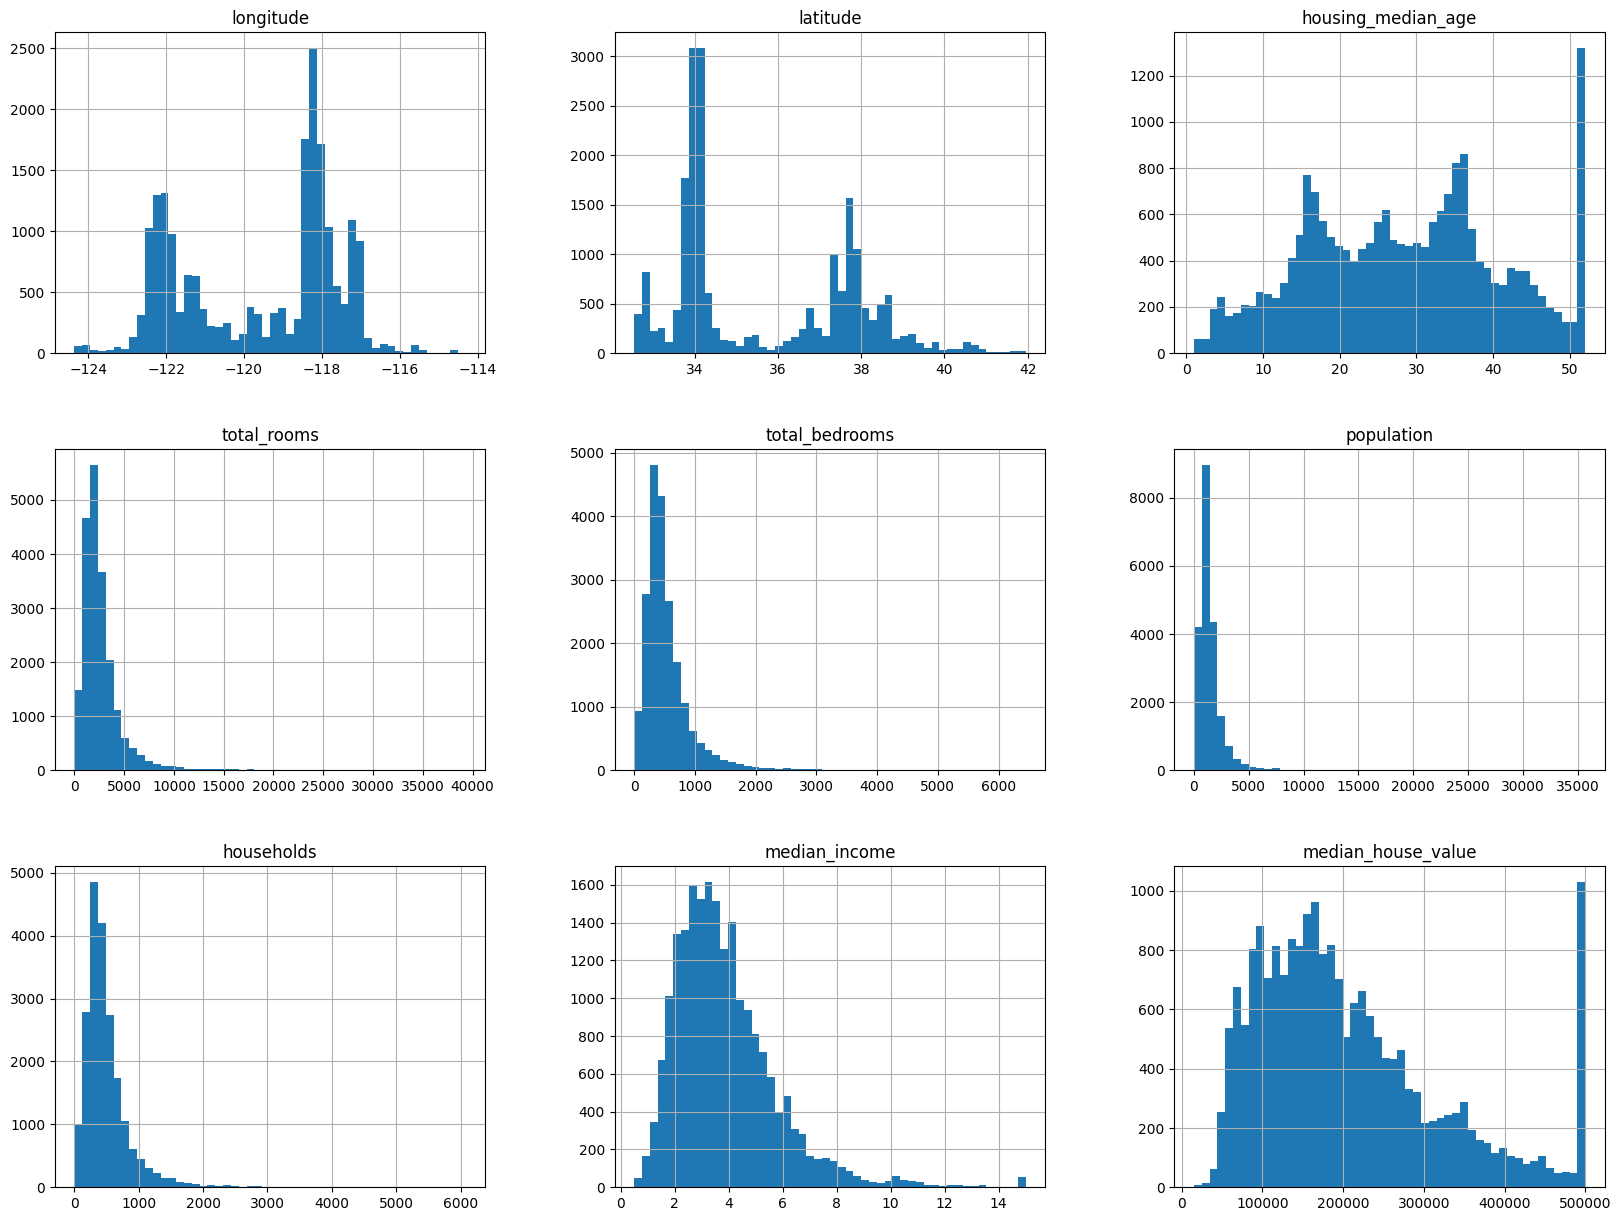

In [15]:
# 코드를 입력해 주세요
df.hist(bins=50, figsize = (20, 15))
plt.show()

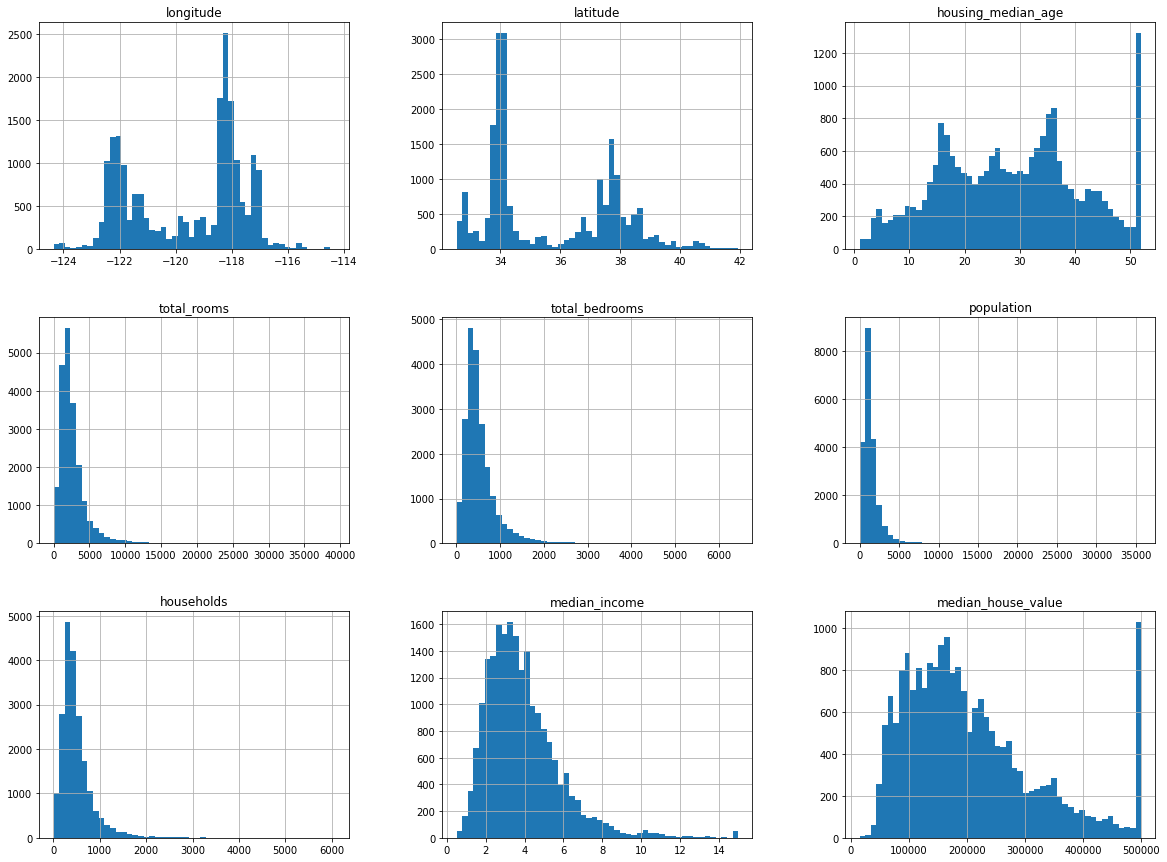

- continuous 변수와 categorical 변수를 생성하세요.
    - continuous : continuous type의 컬럼명이 담긴 리스트
    - categorical : categorical type의 컬럼명이 담긴 리스트

<p><strong>[출력 결과]</strong></p><pre><Figure size 1440x1080 with 9 Axes></pre>

In [16]:
# 코드를 입력해 주세요
continuous = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
categorical = ['ocean_proximity']

- 범주형 컬럼인 ocean_proximity의 범주별 개수를 계산하세요.

In [17]:
# 코드를 입력해 주세요
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<p><strong>[출력 결과]</strong></p><pre><1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64</pre>

- 범주형 컬럼인 ocean_proximity의 범주별 비율을 계산하세요.

In [18]:
# 코드를 입력해 주세요
df['ocean_proximity'].value_counts(normalize = True)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

<p><strong>[출력 결과]</strong></p><pre><1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64</pre>

- 해당 결과를 bar plot으로 시각화 해보세요.

<AxesSubplot: >

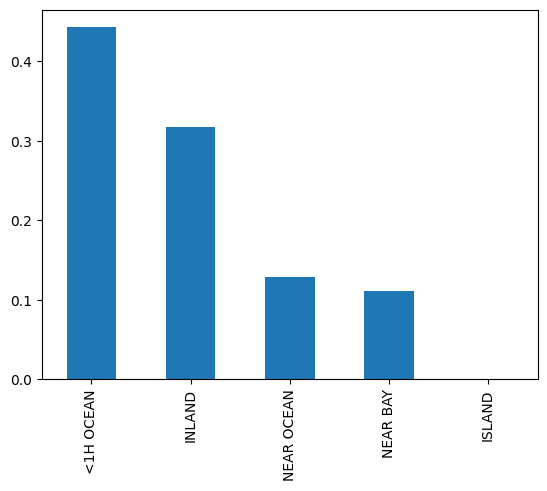

In [19]:
# 코드를 입력해 주세요
df['ocean_proximity'].value_counts(normalize = True).plot(kind='bar')

<p><strong>[출력 결과]</strong></p><pre><AxesSubplot:></pre>

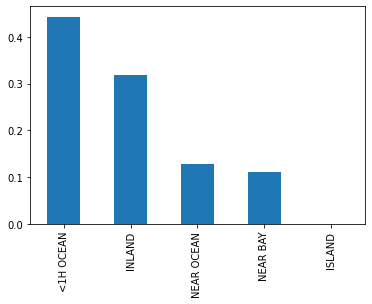

- ocean_proximity 컬럼의 <1H OCEAN 값을 1H OCEAN으로 수정하세요
- < 기호를 제거합니다.

<p><strong>[출력 결과]</strong></p><pre><Figure size 432x288 with 1 Axes></pre>

In [20]:
# 코드를 입력해 주세요
df['ocean_proximity'] = df['ocean_proximity'].str.replace('<', '')
df.loc[df['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = '1H OCEAN'

# 두 방법 모두 가능하다!

- 범주형 컬럼인 ocean_proximity의 범주별 비율을 재계산하세요.

In [21]:
# 코드를 입력해 주세요
df['ocean_proximity'].value_counts(normalize = True)

1H OCEAN      0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

<p><strong>[출력 결과]</strong></p><pre>1H OCEAN      0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64</pre>

- scatter_matrix를 이용하여 컬럼과 컬럼의 관계와 컬럼의 밀도를 확인합니다.

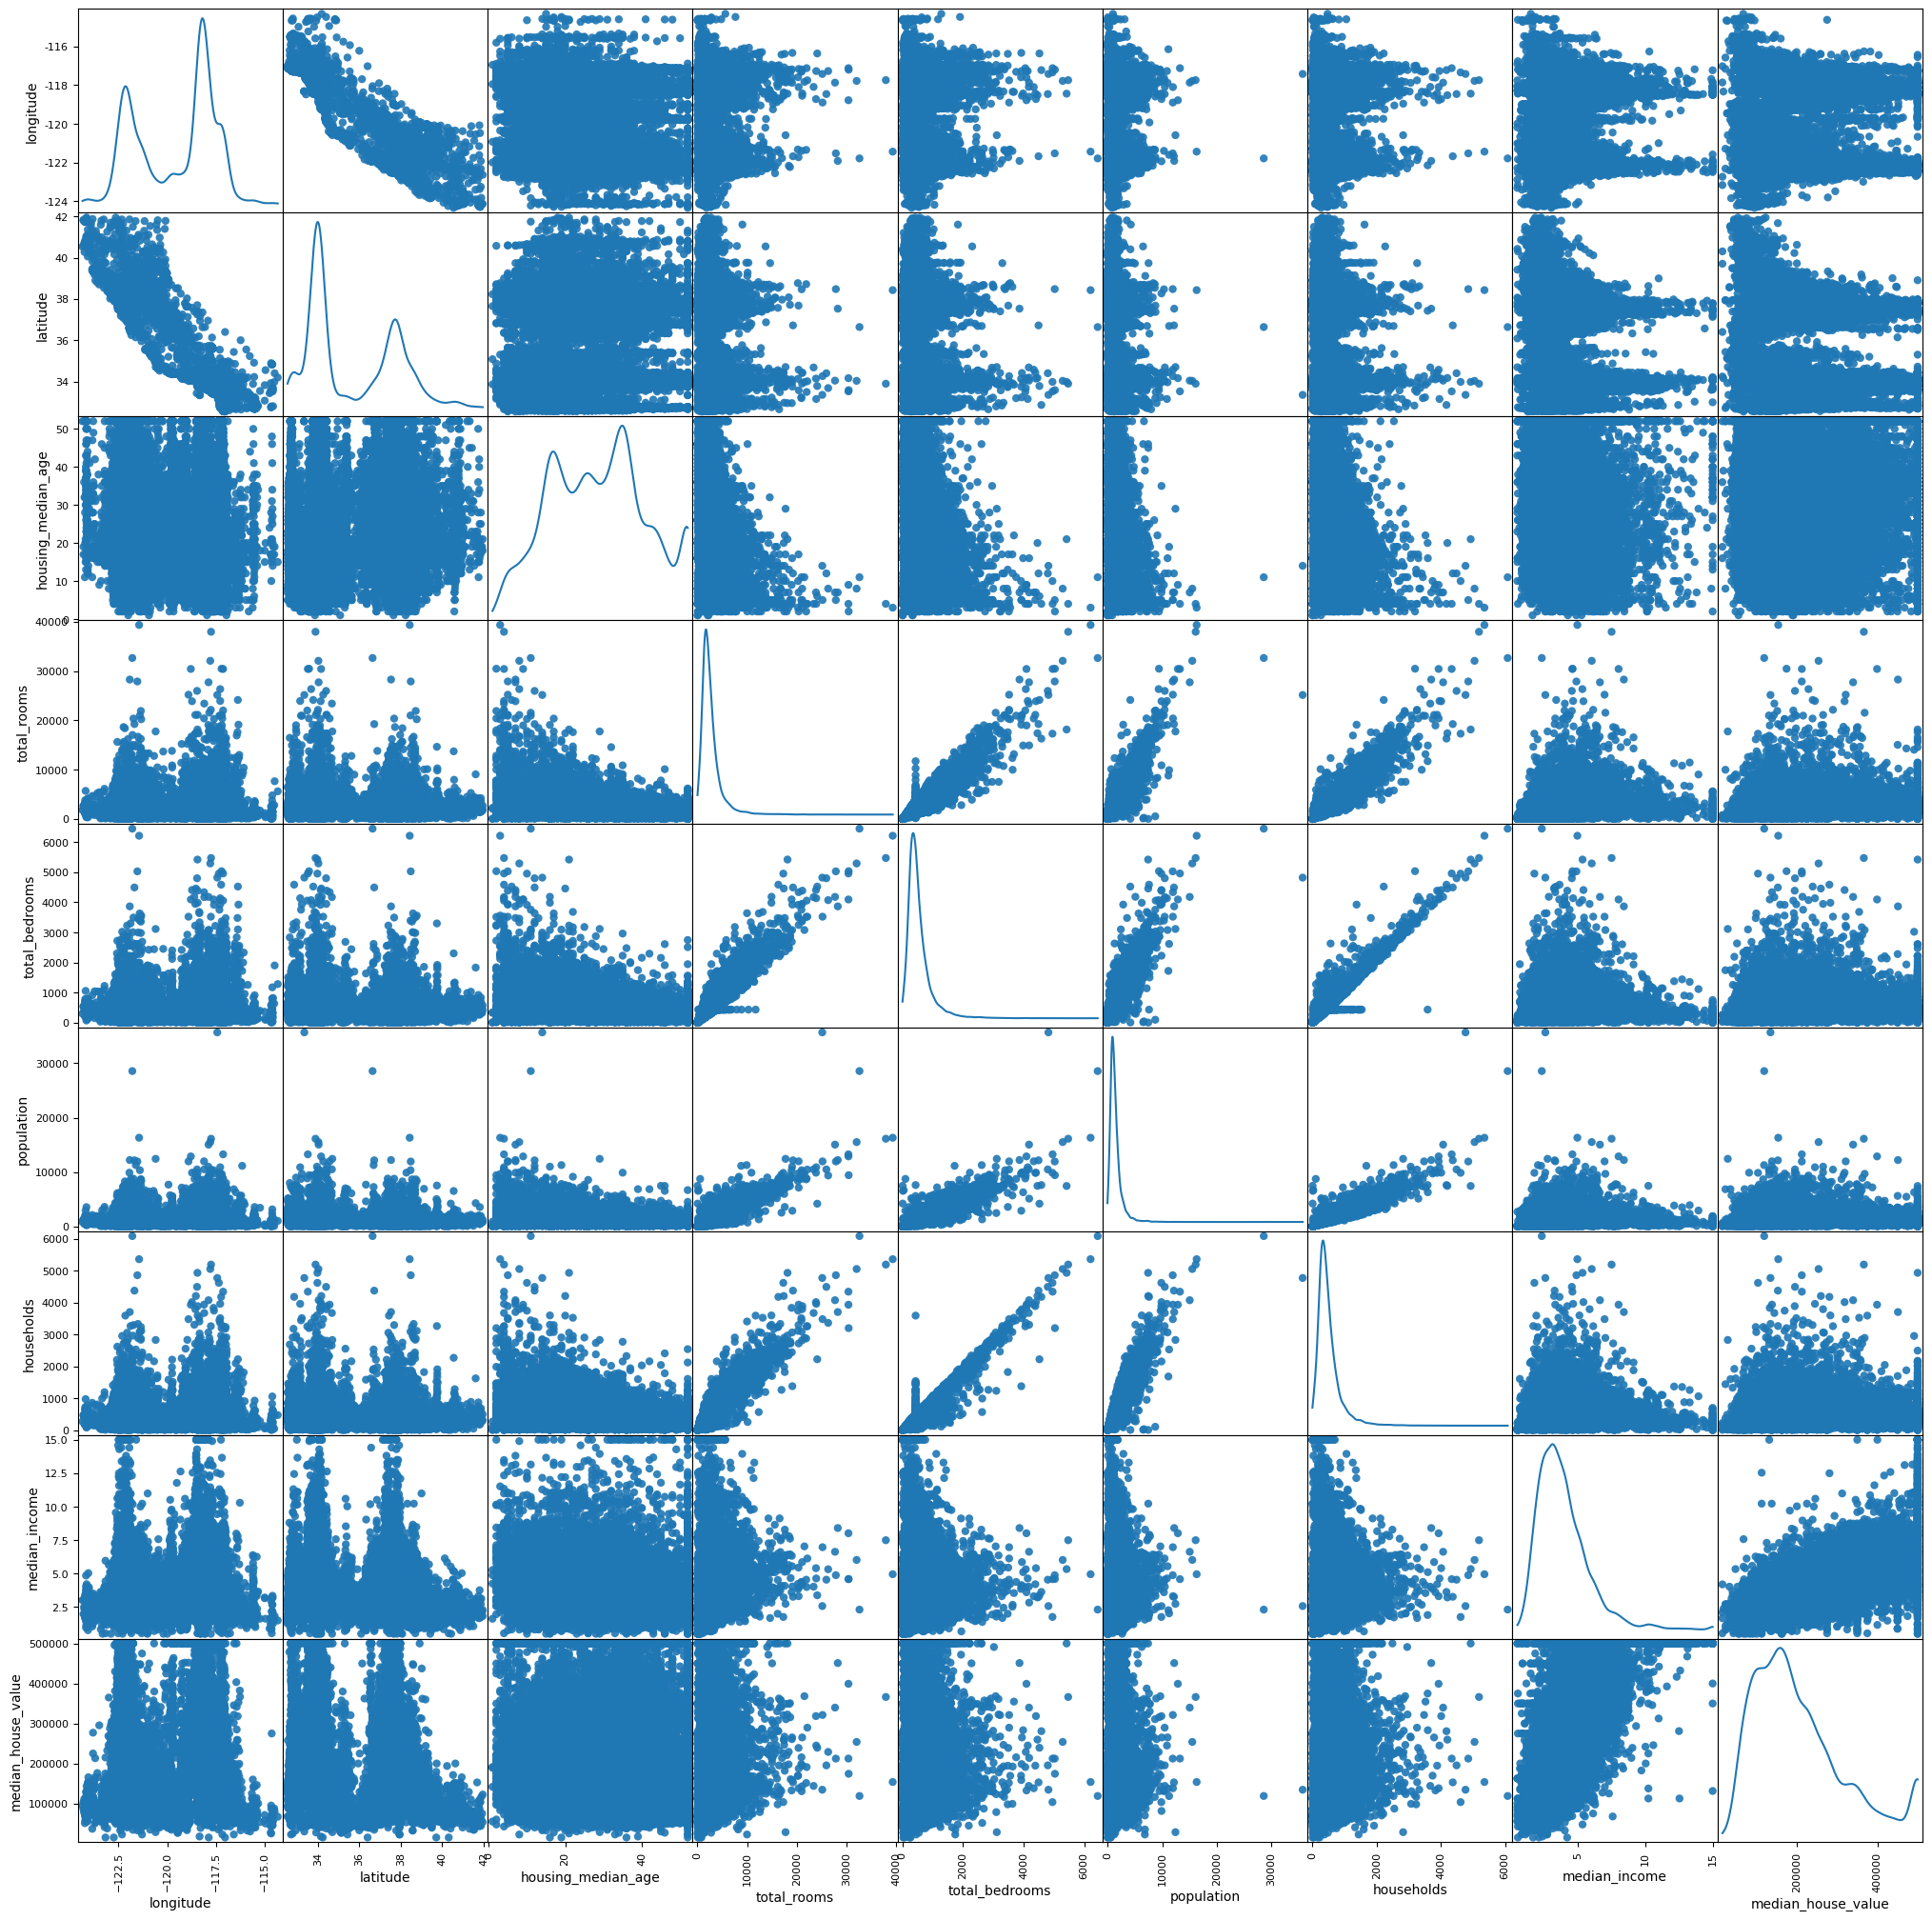

In [22]:
scatter_matrix(df, figsize = (25,25), alpha=0.9, diagonal="kde", marker="o");

- folium을 이용하여 실제 지도에 시각화를 진행합니다.

In [23]:
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(california_map)
california_map
# 색상이 붉은색에 가까울수록 데이터가 많이 존재합니다.
# folium - 지도 시각화

- 데이터 프레임에서 longitude와 latitude 컬럼을 추출하여 X에 median_house_value 컬럼을 추출하여 Y에 저장하세요.

In [24]:
# 코드를 입력해 주세요
X = df[['longitude', 'latitude']]
Y = df['median_house_value']

- DecisionTreeRegressor를 이용하여 X와 Y를 학습하세요.

In [25]:
# 코드를 입력해 주세요
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(X, Y)

- plot_tree 함수를 이용하여 그래프를 시각화합니다.

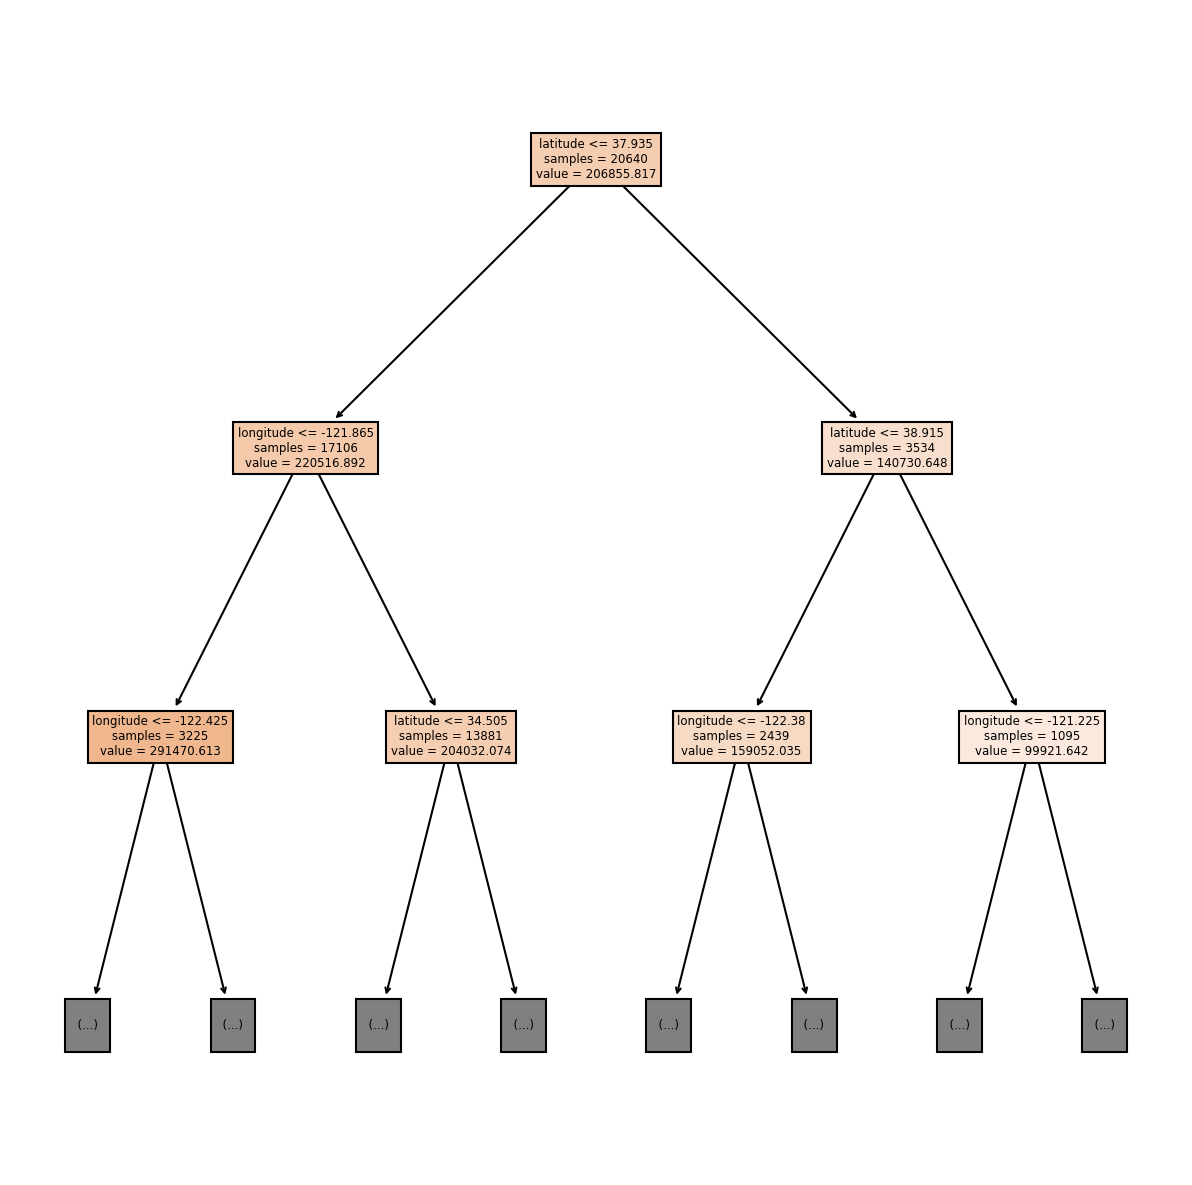

In [26]:
# plot_tree 함수를 이용하여 그래프를 시각화합니다.
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10), dpi=150)
plot_tree(model, max_depth=2,feature_names=df.columns, impurity=False, filled=True)
plt.show()

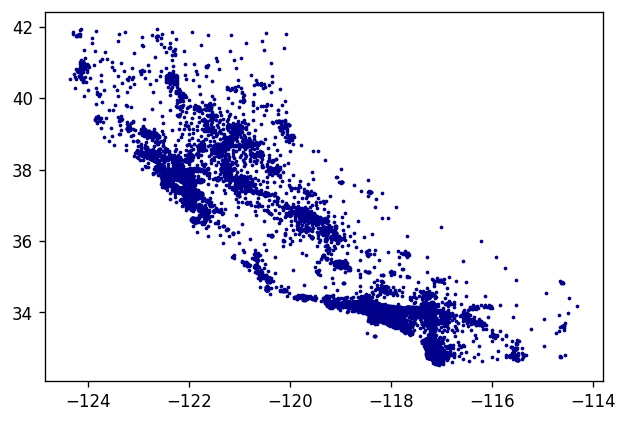

In [27]:
# longitude 컬럼을 x latitude 컬럼을 y로 하는 scatter plot을 그리세요.
# 색상(c)은 DarkBlue를 점의 크기(s)는 1.5로 지정하세요.
plt.figure(figsize=[6,4], dpi=120)
plt.scatter(x=df["longitude"],y=df["latitude"], c='DarkBlue', s=1.5)

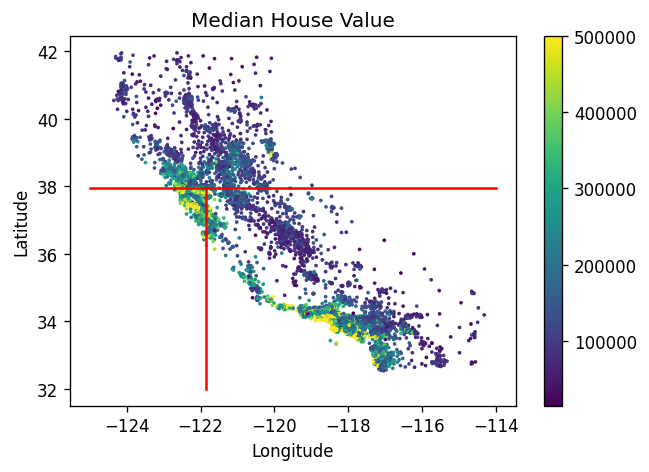

In [28]:
# 집값 측면에서 "위치"가 얼마나 영향이 있는지 확인
plt.figure(figsize=[6,4], dpi=120)
plt.scatter(x=df["longitude"],y=df["latitude"],c=df["median_house_value"], s=1.5)
splits = model.tree_.threshold[:2]
plt.plot([-125,-114],[splits[0],splits[0]], c='red')
plt.plot([splits[1],splits[1]],[32,splits[0]], c='red')
# plt.ylim(32,42)
# plt.xlim(-125,-114)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Median House Value")
plt.colorbar()
plt.show()

# 학습용으로 위/경도는 충분히 사용할만하다
# 바닷가 근처로 갈 수록 집값이 높아지는걸 볼 수 있다.

- x와 y를 train과 test로 분할하세요.
- random_state는 0을 적용합니다.

In [29]:
# 코드를 입력해 주세요
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

- DecisionTree모델을 이용하여 데이터를 학습하고 평가합니다.

In [30]:
# 코드를 입력해 주세요
model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9570957844526335, 0.7063972970300969)

<p><strong>[출력 결과]</strong></p><pre>(0.9570957844526335, 0.7143979764110779)</pre>

- test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.


In [31]:
# 코드를 입력해 주세요
from sklearn.metrics import mean_absolute_error, mean_squared_error
p_test = model.predict(x_test)
print("MAE : ", mean_absolute_error(y_test, p_test))
print("MSE : ", mean_squared_error(y_test, p_test))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, p_test)))

MAE :  37640.397768626186
MSE :  3880989249.7837877
RMSE :  62297.5862275882


<p><strong>[출력 결과]</strong></p><pre>MAE : 37397.97451281223
MSE : 3775232217.050552
RMSE : 61442.9183637183
</pre>

- subplot과 sns.histplot 함수를 이용하여 continuous컬럼의 분포를 확인하세요.

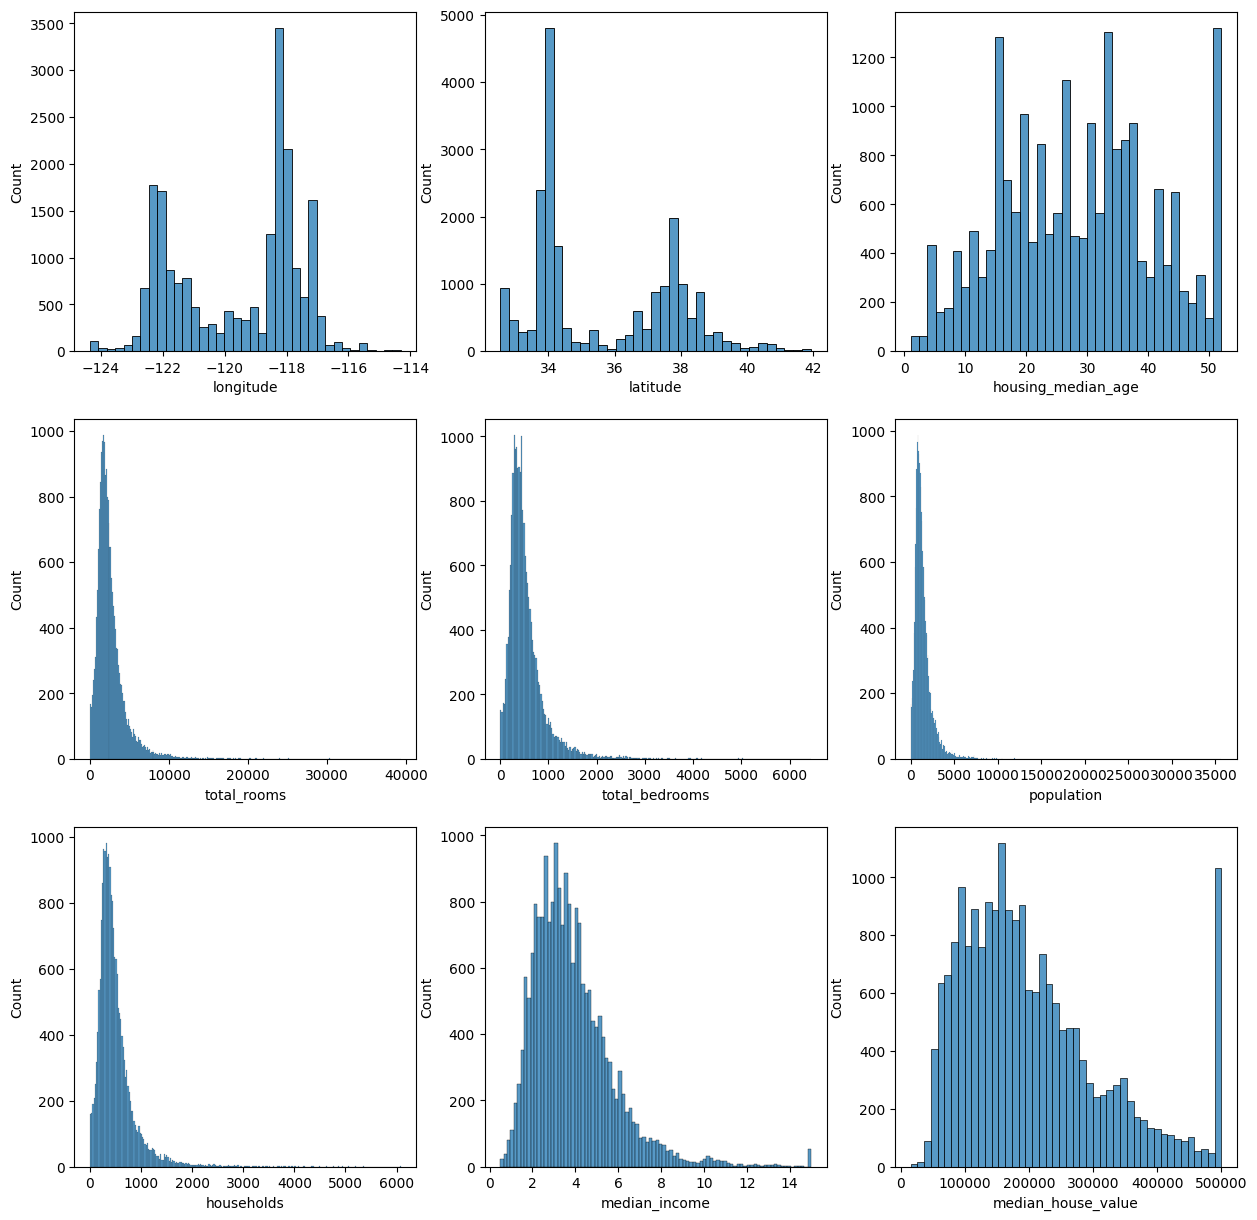

In [32]:
# 코드를 입력해 주세요
plt.figure(figsize=(15, 15))
for index, col_name in enumerate(continuous):
    plt.subplot(3, 3, index+1)
    sns.histplot(df[col_name])

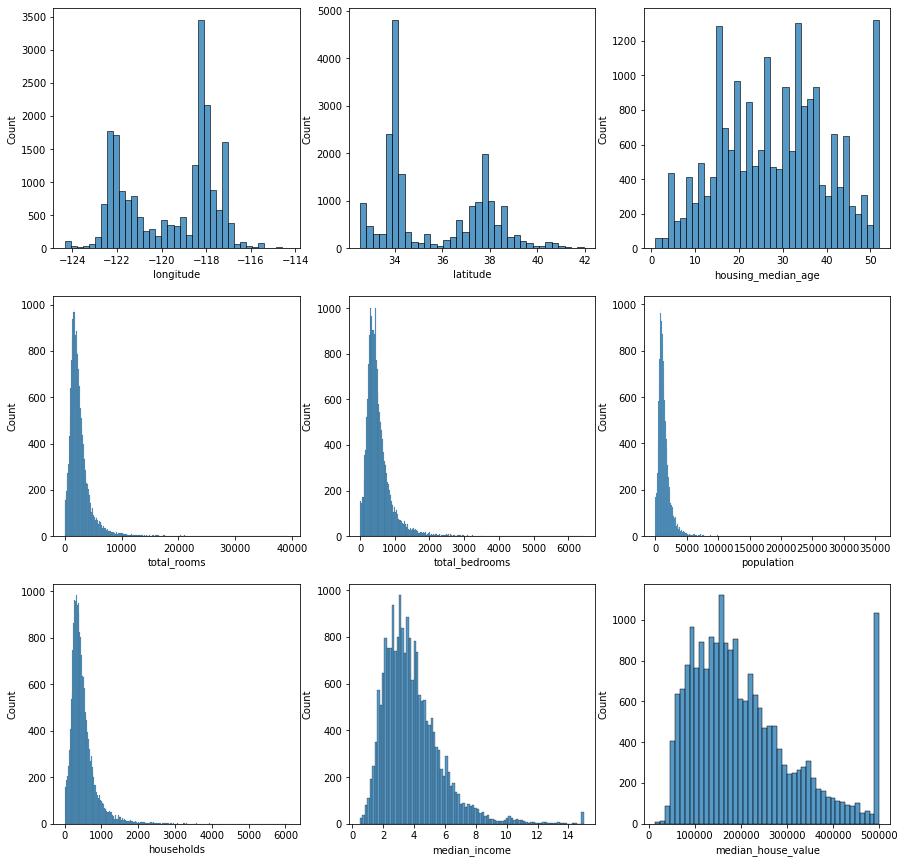

- 아래 컬럼은 log 변환을 적용해주세요.
- total_rooms, total_bedrooms, population, households, median_income, median_house_value

<p><strong>[출력 결과]</strong></p><pre><Figure size 1080x1080 with 9 Axes></pre>

In [33]:
# 코드를 입력해 주세요
target_col = 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'.split(', ')
for col_name in target_col:
    df[col_name] = np.log1p(df[col_name])

- subplot과 sns.histplot 함수를 이용하여 continuous컬럼의 분포를 재확인하세요.

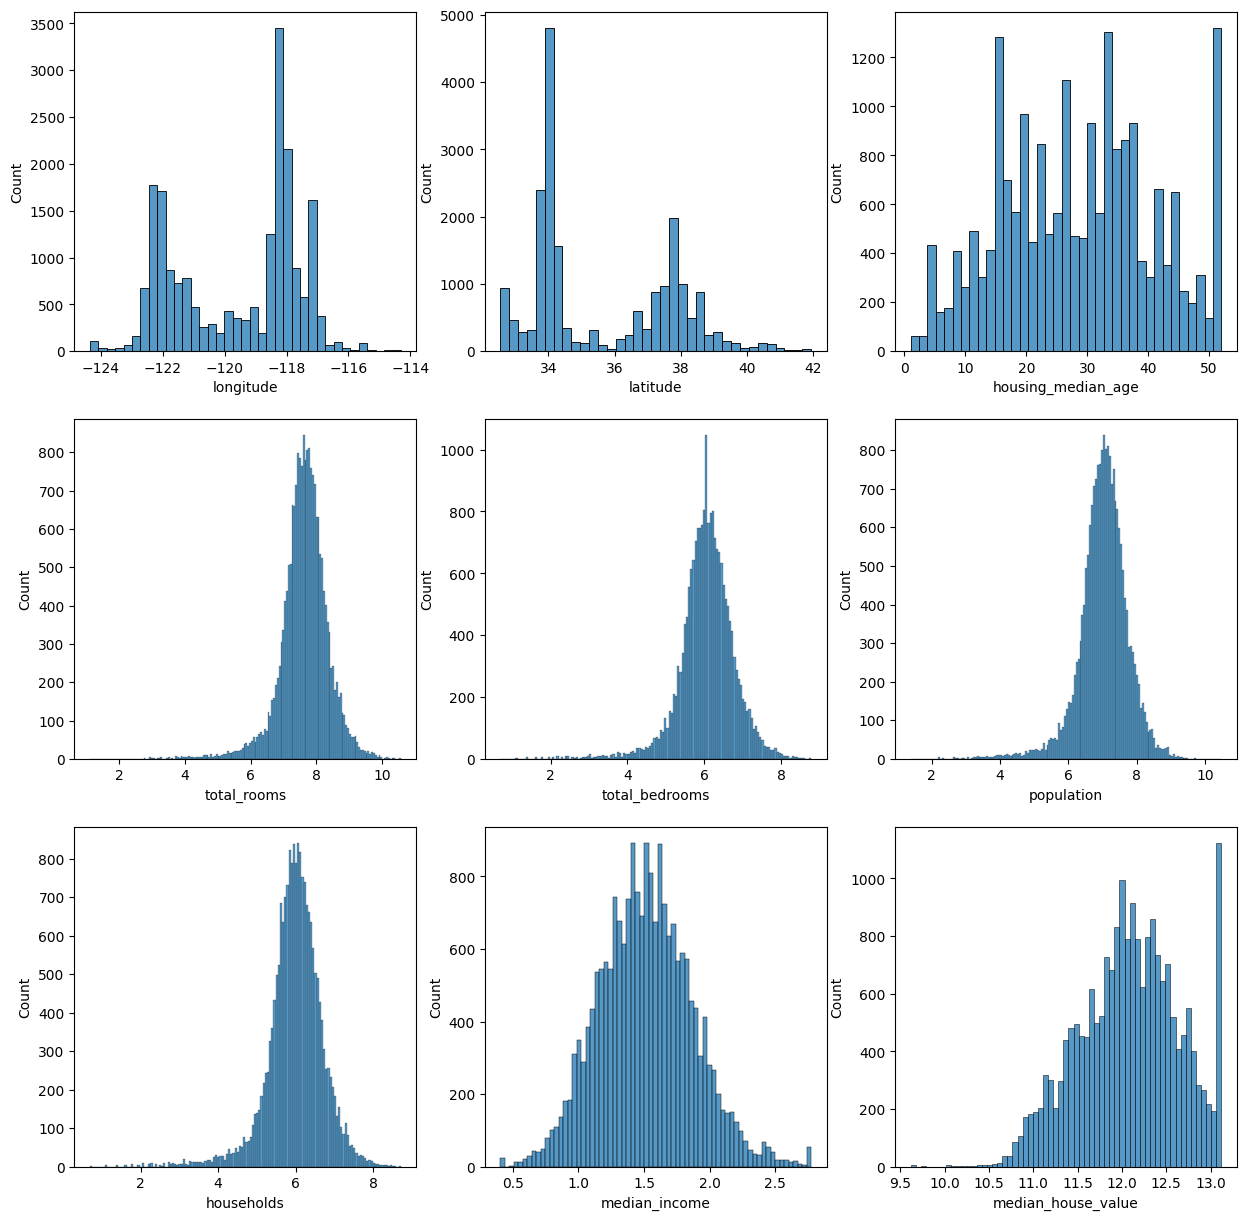

In [34]:
# 코드를 입력해 주세요
plt.figure(figsize = (15, 15))
for index, col_name in enumerate(continuous):
    plt.subplot(3,3,index+1)
    sns.histplot(df[col_name])

# 로그 변환하니 scale도 줄어들고 고르게 분포되는 것을 볼 수 있다.

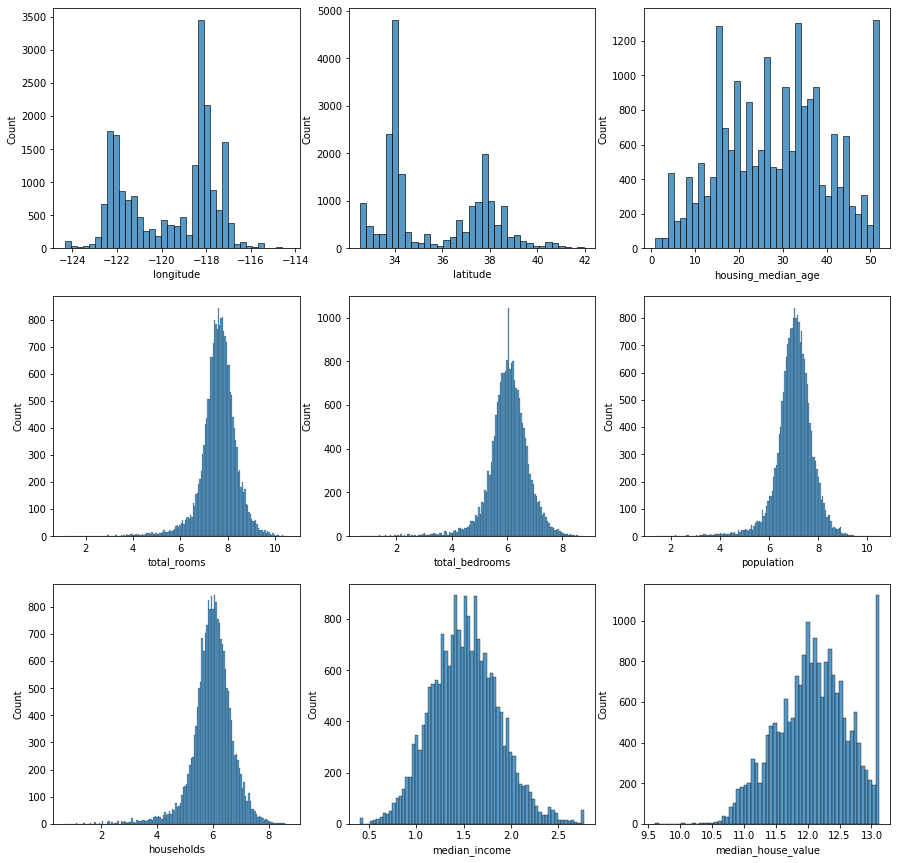

- continuous 컬럼만 추출하여 df_continuous에 저장하세요.
- copy함수를 사용하세요

<p><strong>[출력 결과]</strong></p><pre><Figure size 1080x1080 with 9 Axes></pre>

In [35]:
# 코드를 입력해 주세요
df_continuous = df[continuous].copy()
df_continuous

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,0.940124,11.265758
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,1.268861,11.252872
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,0.993252,11.432810
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.053336,11.346883


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>longitude</th>
      <th>latitude</th>
      <th>housing_median_age</th>
      <th>total_rooms</th>
      <th>total_bedrooms</th>
      <th>population</th>
      <th>households</th>
      <th>median_income</th>
      <th>median_house_value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-122.23</td>
      <td>37.88</td>
      <td>41.0</td>
      <td>6.781058</td>
      <td>4.867534</td>
      <td>5.777652</td>
      <td>4.844187</td>
      <td>2.232720</td>
      <td>13.022766</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-122.22</td>
      <td>37.86</td>
      <td>21.0</td>
      <td>8.867850</td>
      <td>7.009409</td>
      <td>7.784057</td>
      <td>7.037906</td>
      <td>2.230165</td>
      <td>12.789687</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-122.24</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>7.291656</td>
      <td>5.252273</td>
      <td>6.208590</td>
      <td>5.181784</td>
      <td>2.111110</td>
      <td>12.771673</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-122.25</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>7.150701</td>
      <td>5.463832</td>
      <td>6.326149</td>
      <td>5.393628</td>
      <td>1.893579</td>
      <td>12.740520</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-122.25</td>
      <td>37.85</td>
      <td>52.0</td>
      <td>7.395108</td>
      <td>5.638355</td>
      <td>6.338594</td>
      <td>5.560682</td>
      <td>1.578195</td>
      <td>12.743154</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>20635</th>
      <td>-121.09</td>
      <td>39.48</td>
      <td>25.0</td>
      <td>7.418181</td>
      <td>5.926926</td>
      <td>6.740519</td>
      <td>5.802118</td>
      <td>0.940124</td>
      <td>11.265758</td>
    </tr>
    <tr>
      <th>20636</th>
      <td>-121.21</td>
      <td>39.49</td>
      <td>18.0</td>
      <td>6.548219</td>
      <td>5.017280</td>
      <td>5.877736</td>
      <td>4.744932</td>
      <td>1.268861</td>
      <td>11.252872</td>
    </tr>
    <tr>
      <th>20637</th>
      <td>-121.22</td>
      <td>39.43</td>
      <td>17.0</td>
      <td>7.720905</td>
      <td>6.186209</td>
      <td>6.915723</td>
      <td>6.073045</td>
      <td>0.993252</td>
      <td>11.432810</td>
    </tr>
    <tr>
      <th>20638</th>
      <td>-121.32</td>
      <td>39.43</td>
      <td>18.0</td>
      <td>7.528869</td>
      <td>6.016157</td>
      <td>6.609349</td>
      <td>5.857933</td>
      <td>1.053336</td>
      <td>11.346883</td>
    </tr>
    <tr>
      <th>20639</th>
      <td>-121.24</td>
      <td>39.37</td>
      <td>16.0</td>
      <td>7.932362</td>
      <td>6.424869</td>
      <td>7.235619</td>
      <td>6.274762</td>
      <td>1.220417</td>
      <td>11.400887</td>
    </tr>
  </tbody>
</table>
<p>20640 rows × 9 columns</p>
</div>

- df_continuous 데이터 프레임을 표준화하세요

In [36]:
# 코드를 입력해 주세요
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(df_continuous)

- 표준화된 결과를 df 데이터 프레임에 대입하세요.

In [37]:
# 코드를 입력해 주세요
df.loc[:, continuous] = X_Scaled

- get_dummies 함수를 이용하여 범주형 컬럼에 One Hot 변환을 적용하세요.

In [38]:
# 코드를 입력해 주세요
df = pd.get_dummies(df)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-1.131133,-1.642192,-1.694943,-1.569395,1.995505,1.647949,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,1.651357,1.320043,1.030337,1.449251,1.988380,1.238403,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.450310,-1.110094,-1.109604,-1.104849,1.656444,1.206751,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.638257,-0.817506,-0.949925,-0.813343,1.049948,1.152012,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.312370,-0.576140,-0.933021,-0.583469,0.170631,1.156639,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.281605,-0.177042,-0.387090,-0.251243,-1.608366,-1.439305,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-1.441596,-1.435092,-1.559000,-1.705974,-0.691819,-1.461948,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,0.122042,0.181548,-0.149112,0.121563,-1.460242,-1.145776,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.134015,-0.053635,-0.565257,-0.174439,-1.292722,-1.296760,0,1,0,0,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>longitude</th>
      <th>latitude</th>
      <th>housing_median_age</th>
      <th>total_rooms</th>
      <th>total_bedrooms</th>
      <th>population</th>
      <th>households</th>
      <th>median_income</th>
      <th>median_house_value</th>
      <th>ocean_proximity_1H OCEAN</th>
      <th>ocean_proximity_INLAND</th>
      <th>ocean_proximity_ISLAND</th>
      <th>ocean_proximity_NEAR BAY</th>
      <th>ocean_proximity_NEAR OCEAN</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-1.327835</td>
      <td>1.052548</td>
      <td>0.982143</td>
      <td>-1.131133</td>
      <td>-1.642192</td>
      <td>-1.694943</td>
      <td>-1.569395</td>
      <td>1.995505</td>
      <td>1.647949</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-1.322844</td>
      <td>1.043185</td>
      <td>-0.607019</td>
      <td>1.651357</td>
      <td>1.320043</td>
      <td>1.030337</td>
      <td>1.449251</td>
      <td>1.988380</td>
      <td>1.238403</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-1.332827</td>
      <td>1.038503</td>
      <td>1.856182</td>
      <td>-0.450310</td>
      <td>-1.110094</td>
      <td>-1.109604</td>
      <td>-1.104849</td>
      <td>1.656444</td>
      <td>1.206751</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-1.337818</td>
      <td>1.038503</td>
      <td>1.856182</td>
      <td>-0.638257</td>
      <td>-0.817506</td>
      <td>-0.949925</td>
      <td>-0.813343</td>
      <td>1.049948</td>
      <td>1.152012</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-1.337818</td>
      <td>1.038503</td>
      <td>1.856182</td>
      <td>-0.312370</td>
      <td>-0.576140</td>
      <td>-0.933021</td>
      <td>-0.583469</td>
      <td>0.170631</td>
      <td>1.156639</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>20635</th>
      <td>-0.758826</td>
      <td>1.801647</td>
      <td>-0.289187</td>
      <td>-0.281605</td>
      <td>-0.177042</td>
      <td>-0.387090</td>
      <td>-0.251243</td>
      <td>-1.608366</td>
      <td>-1.439305</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>20636</th>
      <td>-0.818722</td>
      <td>1.806329</td>
      <td>-0.845393</td>
      <td>-1.441596</td>
      <td>-1.435092</td>
      <td>-1.559000</td>
      <td>-1.705974</td>
      <td>-0.691819</td>
      <td>-1.461948</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>20637</th>
      <td>-0.823713</td>
      <td>1.778237</td>
      <td>-0.924851</td>
      <td>0.122042</td>
      <td>0.181548</td>
      <td>-0.149112</td>
      <td>0.121563</td>
      <td>-1.460242</td>
      <td>-1.145776</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>20638</th>
      <td>-0.873626</td>
      <td>1.778237</td>
      <td>-0.845393</td>
      <td>-0.134015</td>
      <td>-0.053635</td>
      <td>-0.565257</td>
      <td>-0.174439</td>
      <td>-1.292722</td>
      <td>-1.296760</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>20639</th>
      <td>-0.833696</td>
      <td>1.750146</td>
      <td>-1.004309</td>
      <td>0.403995</td>
      <td>0.511618</td>
      <td>0.285399</td>
      <td>0.399134</td>
      <td>-0.826886</td>
      <td>-1.201869</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>20640 rows × 14 columns</p>
</div>

- median_house_value 컬럼을 제외한 나머지를 X 변수에 저장해주세요

In [39]:
# 코드를 입력해 주세요
X = df.loc[:, df.columns != 'median_house_value']
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-1.131133,-1.642192,-1.694943,-1.569395,1.995505,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,1.651357,1.320043,1.030337,1.449251,1.988380,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.450310,-1.110094,-1.109604,-1.104849,1.656444,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.638257,-0.817506,-0.949925,-0.813343,1.049948,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.312370,-0.576140,-0.933021,-0.583469,0.170631,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.281605,-0.177042,-0.387090,-0.251243,-1.608366,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-1.441596,-1.435092,-1.559000,-1.705974,-0.691819,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,0.122042,0.181548,-0.149112,0.121563,-1.460242,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.134015,-0.053635,-0.565257,-0.174439,-1.292722,0,1,0,0,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>longitude</th>
      <th>latitude</th>
      <th>housing_median_age</th>
      <th>total_rooms</th>
      <th>total_bedrooms</th>
      <th>population</th>
      <th>households</th>
      <th>median_income</th>
      <th>ocean_proximity_1H OCEAN</th>
      <th>ocean_proximity_INLAND</th>
      <th>ocean_proximity_ISLAND</th>
      <th>ocean_proximity_NEAR BAY</th>
      <th>ocean_proximity_NEAR OCEAN</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>-1.327835</td>
      <td>1.052548</td>
      <td>0.982143</td>
      <td>-1.131133</td>
      <td>-1.642192</td>
      <td>-1.694943</td>
      <td>-1.569395</td>
      <td>1.995505</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>-1.322844</td>
      <td>1.043185</td>
      <td>-0.607019</td>
      <td>1.651357</td>
      <td>1.320043</td>
      <td>1.030337</td>
      <td>1.449251</td>
      <td>1.988380</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>-1.332827</td>
      <td>1.038503</td>
      <td>1.856182</td>
      <td>-0.450310</td>
      <td>-1.110094</td>
      <td>-1.109604</td>
      <td>-1.104849</td>
      <td>1.656444</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>-1.337818</td>
      <td>1.038503</td>
      <td>1.856182</td>
      <td>-0.638257</td>
      <td>-0.817506</td>
      <td>-0.949925</td>
      <td>-0.813343</td>
      <td>1.049948</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>-1.337818</td>
      <td>1.038503</td>
      <td>1.856182</td>
      <td>-0.312370</td>
      <td>-0.576140</td>
      <td>-0.933021</td>
      <td>-0.583469</td>
      <td>0.170631</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>20635</th>
      <td>-0.758826</td>
      <td>1.801647</td>
      <td>-0.289187</td>
      <td>-0.281605</td>
      <td>-0.177042</td>
      <td>-0.387090</td>
      <td>-0.251243</td>
      <td>-1.608366</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>20636</th>
      <td>-0.818722</td>
      <td>1.806329</td>
      <td>-0.845393</td>
      <td>-1.441596</td>
      <td>-1.435092</td>
      <td>-1.559000</td>
      <td>-1.705974</td>
      <td>-0.691819</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>20637</th>
      <td>-0.823713</td>
      <td>1.778237</td>
      <td>-0.924851</td>
      <td>0.122042</td>
      <td>0.181548</td>
      <td>-0.149112</td>
      <td>0.121563</td>
      <td>-1.460242</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>20638</th>
      <td>-0.873626</td>
      <td>1.778237</td>
      <td>-0.845393</td>
      <td>-0.134015</td>
      <td>-0.053635</td>
      <td>-0.565257</td>
      <td>-0.174439</td>
      <td>-1.292722</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>20639</th>
      <td>-0.833696</td>
      <td>1.750146</td>
      <td>-1.004309</td>
      <td>0.403995</td>
      <td>0.511618</td>
      <td>0.285399</td>
      <td>0.399134</td>
      <td>-0.826886</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>20640 rows × 13 columns</p>
</div>

- median_house_value 컬럼을 Y 변수에 저장해주세요

In [40]:
# 코드를 입력해 주세요
Y = df['median_house_value']
Y

0        1.647949
1        1.238403
2        1.206751
3        1.152012
4        1.156639
           ...   
20635   -1.439305
20636   -1.461948
20637   -1.145776
20638   -1.296760
20639   -1.201869
Name: median_house_value, Length: 20640, dtype: float64

<p><strong>[출력 결과]</strong></p><pre>0        1.647949
1        1.238403
2        1.206751
3        1.152012
4        1.156639
           ...   
20635   -1.439305
20636   -1.461948
20637   -1.145776
20638   -1.296760
20639   -1.201869
Name: median_house_value, Length: 20640, dtype: float64</pre>

- X와 Y를 train과 test로 분할하세요.

In [41]:
# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = train_test_split(X, Y)

- DecisionTreeRegressor 모델을 이용하여 학습하고 평가하세요.

In [42]:
# 코드를 입력해 주세요
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.6758778601742054)

<p><strong>[출력 결과]</strong></p><pre>(1.0, 0.6899927573291436)</pre>

- test 데이터에 대해 MSE, MAE, RMSE 오류를 계산합니다.

In [43]:
# 코드를 입력해 주세요
p_test = model.predict(x_test)
print('MAE :', mean_absolute_error(y_test, p_test))
print('MSE :', mean_squared_error(y_test, p_test))
print('RMSE :', np.sqrt(mean_squared_error(y_test, p_test)))

# 로그 변환 적용된 값이라서 역변환 필요

MAE : 0.39033685098253557
MSE : 0.32394944974324613
RMSE : 0.5691655732238609


<p><strong>[출력 결과]</strong></p><pre>MAE : 0.38076003963831967
MSE : 0.3088543713611884
RMSE : 0.5557466791274496
</pre>

## 제출

제출을 위해 본 연습문제의 데이터 전처리 및 Decision Tree 모델 학습 과정을 다시 수행한 이후 테스트 데이터의 MSE 값과 MAE 값을 아래와 같은 dictionary로 만들어 `result`에 저장하세요.
- `{"train": 0.123, "test": 0.456}`
- 구체적으로 다음 과정을 수행합니다.
    1. 데이터 로드하기
    2. `total_bedrooms` 컬럼의 결측치를 `total_bedrooms`의 중간값(median)으로 대체하기
    3. `logitude`와 `latitude` 컬럼을 `X`로, `median_house_value`를 `Y`로 지정하기
    4. 학습 데이터와 테스트 데이터로 분리하기.
        - 테스트 데이터를 전체의 **25%로** 합니다.
        - **분리할 때 반드시 `random_state=SEED`를 추가합니다.** 이를 추가하지 않으면 제대로 채점되지 않습니다.
    5. Decision Tree 회귀 모델 학습하기: 모델 생성할 때 **반드시 `random_state=SEED`을 지정합니다.**
    6. 학습된 모델에 테스트 데이터 적용하여 예측값 구하기
    7. 테스트 데이터의 MSE 값과 MAE 값 제출하기

In [48]:
# SEED 값 바꾸면 제대로 채점되지 않 수 있습니다.
SEED = 2023

df = pd.read_csv('/mnt/elice/dataset/housing.csv')

df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())
X = df[['longitude', 'latitude']]
Y = df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = SEED)

model = DecisionTreeRegressor(random_state = SEED).fit(x_train, y_train)

y_pred = model.predict(x_test)


# TODO: 지시사항에서 지정한 과정을 다시 수행하세요.
result = {
    "test_mse": mean_squared_error(y_test, y_pred),
    "test_mae": mean_absolute_error(y_test, y_pred),
}

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [49]:
import os
import json

assert isinstance(result, dict), \
    "'result' 변수에 요구사항에 맞는 dictionary가 저장되어 있는지 확인하세요."

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 1.823 seconds
=== Message ===
제출 완료되었습니다.


0